In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocess

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import skimage
from skimage.transform import resize

import os
import torch
import torch.nn as nn
import torchvision
from torchvision import models
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [ ]:
# !unzip -uq "/content/drive/My Drive/ASL_Data.zip"
!unzip -o "/content/drive/My Drive/ASL_Data.zip" | awk 'BEGIN {ORS=" "} {if(NR%10==0)print "."}'

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [ ]:
batch_size = 10
imageSize = 76
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = '/content/asl_alphabet_train/asl_alphabet_train/'

In [ ]:
def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int64)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y

In [ ]:
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


In [ ]:
# train = pd.read_csv("/content/drive/MyDrive/archive/sign_mnist_train/sign_mnist_train.csv")
# test = pd.read_csv("/content/drive/MyDrive/archive/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 76, 76, 3)
The shape of y_train is :  (87000,)


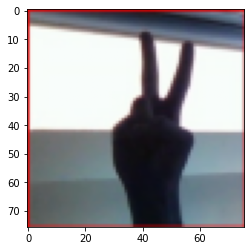

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_train, y_train, test_size=0.4,random_state=42,stratify=y_train)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5,random_state=42,stratify=y_val_test)

In [ ]:
y_cat_train = to_categorical(y_train,29)
y_cat_val = to_categorical(y_val,29)
y_cat_test = to_categorical(y_test,29)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_val.shape)
print(y_cat_test.shape)

(52200, 76, 76, 3)
(52200,)
(17400, 76, 76, 3)
(17400,)
(17400, 76, 76, 3)
(17400,)
(52200, 29)
(17400, 29)
(17400, 29)


(76, 76, 3)
22


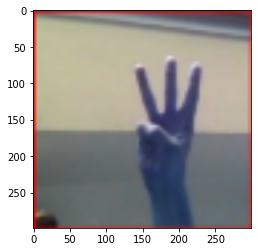

In [ ]:
print(X_train[0].shape)

image = cv2.resize(X_train[0], (299, 299))

plt.imshow(image)
print(y_train[0])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

In [ ]:
from keras.engine import training
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications
input_shape = (76, 76, 3)
nclass = 29

base_model = tf.keras.applications.ResNet50(weights='imagenet', 
                                include_top=False, 
                                input_shape=(76, 76,3))
base_model.trainable = False

inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(nclass, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# add_model = Sequential()
# add_model.add(base_model)
# add_model.add(GlobalAveragePooling2D())
# add_model.add(Dropout(0.5))
# add_model.add(Dense(nclass, activation='softmax'))
# model = add_model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 76, 76, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 76, 76, 3)         0         
                                                                 
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 29)                59421     
                                                                 
Total params: 23,647,133
Trainable params: 59,421
Non-trainable params: 23,587,712
____________________________________________

In [ ]:
file_path="/content/best_model.h5"

# checkpoint = ModelCheckpoint(file_path, monitor='acc', verbose=1, save_best_only=True, mode='max')
mc = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, mode='min', save_best_only=True)

# early = EarlyStopping(monitor="acc", mode="max", patience=15)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

callbacks_list = [es, mc] #early

model.fit(x=X_train,
          y=y_cat_train,
          validation_data=(X_val, y_cat_val),
          batch_size=32,
          epochs=30, 
          shuffle=True, 
          verbose=2,
          callbacks=callbacks_list)



Epoch 1/30

Epoch 1: val_loss improved from inf to 2.90273, saving model to /content/best_model.h5
1632/1632 - 47s - loss: 3.0716 - accuracy: 0.1427 - val_loss: 2.9027 - val_accuracy: 0.1658 - 47s/epoch - 29ms/step
Epoch 2/30

Epoch 2: val_loss improved from 2.90273 to 2.59283, saving model to /content/best_model.h5
1632/1632 - 39s - loss: 2.7688 - accuracy: 0.2063 - val_loss: 2.5928 - val_accuracy: 0.2533 - 39s/epoch - 24ms/step
Epoch 3/30

Epoch 3: val_loss improved from 2.59283 to 2.47309, saving model to /content/best_model.h5
1632/1632 - 39s - loss: 2.6444 - accuracy: 0.2361 - val_loss: 2.4731 - val_accuracy: 0.2830 - 39s/epoch - 24ms/step
Epoch 4/30

Epoch 4: val_loss improved from 2.47309 to 2.33398, saving model to /content/best_model.h5
1632/1632 - 39s - loss: 2.5564 - accuracy: 0.2580 - val_loss: 2.3340 - val_accuracy: 0.2906 - 39s/epoch - 24ms/step
Epoch 5/30

Epoch 5: val_loss improved from 2.33398 to 2.32086, saving model to /content/best_model.h5
1632/1632 - 39s - loss: 2

In [ ]:
score = model.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 10s 18ms/step - loss: 1.9363 - accuracy: 0.4197
Accuracy for test images: 41.971 %


## Fine-Tuning!

In [ ]:
file_path="/content/best_model.h5"
model = tf.keras.models.load_model(file_path, compile=False)

In [ ]:
model.layers[2].trainable = True
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 76, 76, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 76, 76, 3)         0         
                                                                 
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 29)                59421     
                                                                 
Total params: 23,647,133
Trainable params: 23,594,013
Non-trainable params: 53,120
____________________________________________

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
score = model.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Pretrain make sure: Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 11s 18ms/step - loss: 1.8947 - accuracy: 0.4401
Pretrain make sure: Accuracy for test images: 44.006 %


In [ ]:
model.fit(x=X_train,
          y=y_cat_train,
          validation_data=(X_val, y_cat_val),
          batch_size=32,
          epochs=10, 
          shuffle=True, 
          verbose=2,
          callbacks=callbacks_list)

Epoch 1/10

Epoch 1: val_loss improved from 1.89573 to 1.84247, saving model to /content/best_model.h5
1632/1632 - 110s - loss: 2.7011 - accuracy: 0.2434 - val_loss: 1.8425 - val_accuracy: 0.4295 - 110s/epoch - 67ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.84247 to 1.58086, saving model to /content/best_model.h5
1632/1632 - 102s - loss: 1.7490 - accuracy: 0.4609 - val_loss: 1.5809 - val_accuracy: 0.5219 - 102s/epoch - 62ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.58086 to 0.95009, saving model to /content/best_model.h5
1632/1632 - 101s - loss: 1.2405 - accuracy: 0.6086 - val_loss: 0.9501 - val_accuracy: 0.6856 - 101s/epoch - 62ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.95009 to 0.65394, saving model to /content/best_model.h5
1632/1632 - 101s - loss: 0.8773 - accuracy: 0.7155 - val_loss: 0.6539 - val_accuracy: 0.7798 - 101s/epoch - 62ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.65394 to 0.62468, saving model to /content/best_model.h5
1632/1632 - 1

In [ ]:
resnet_ft = [1.8425, 1.5809, 0.9501, 0.6539, 0.6247, 0.3822, ]

In [ ]:
score = model.evaluate(x = X_test, y = y_cat_test, verbose = 1)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

544/544 [==============================] - 10s 17ms/step - loss: 0.1644 - accuracy: 0.9403
Accuracy for test images: 94.034 %
